In [1]:
?play


## Part 1: Spectogram forensics

Grab a PDF showing three pairs of waveforms and spectograms from http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab14/worksheet_spectra.pdf. For each one, work with a small group to come up with a proposal for what each sound will sound like, and what you believe is the source of the sound.

Questions you might consider:
* Is the sound pitched or unpitched?
> - A, B: Pitched; C: Unpitched

* How does the sound change in pitch or volume over time?
> - A: Various onset times, jagged sustain times and various decrease times  B: Fast attack and a slow exponantial decrease, C: Instantaneous attack and fast exponential decrease

* Is it a real-world sound or is it synthesised? * Is it a real-world sound or is it synthesised? 
> - A: Probably vocals, because we can see burst of noisy spectra going ito pitched vowel, which then slowly glide in frequency and sometimes the pattern continues or is reversed - turns out it was Rebecca counting
 - B: Pitched instrument, beacuse the evenly spaced harmonics highlight the prsence of a fundamental - turns out it was a piano playing a scale
 - C: Percussive sound due to the noisy spectra and the transients (frequency components at the beginning), there is more energy content on the regular beat ratios, as well as spotting possibly a doubled up beat-enhancing drums (a kick maybe?) - turns out it is a slow rock-and-roll like drum kit playing slowly (constant ride, kick on beat 1 and snare on beat 2 - double kick every other bar)

* How many sounds will you hear? How does this change over time?
> - the same instrument/sound source for A and B, whilst C will probably be a set of percussions

* Does the sound have a musical rhythm or meter? (e.g., is there a pattern to when events happen over time, or to how loud they are over time?)
> - All sounds have a rithmic component as they are regularly space


## Part 2: Frequency Analysis Using the FFT

In [2]:
file1 = wavReadMono("/Users/pesa/Documents/UNI/PMC/Term2/Audio/Lab14/file1.wav")
file2 = wavReadMono("/Users/pesa/Documents/UNI/PMC/Term2/Audio/Lab14/file2.wav")
file3 = wavReadMono("/Users/pesa/Documents/UNI/PMC/Term2/Audio/Lab14/file3.wav")
file4 = wavReadMono("/Users/pesa/Documents/UNI/PMC/Term2/Audio/Lab14/file4.wav")

In [10]:
# Compute the magnitude spectrum for your signal. 
# Plot the spectrum

spec1 = fft.fft(file1)
magSpec1 = abs(spec1)
halfSiz1 = int(size(magSpec1)/2)
print halfSiz1
freqs1 = fftfreq(size(magSpec1), 1/44100)

play(file1)
plot(freqs1[0:halfSiz1], magSpec1[0:halfSiz1])



22272


In [24]:
# 1. file1.wav contains a single sine wave. What frequency is it?
a1 = argmax(magSpec1[0:halfSiz1])
print a1
print freqs1[a1]

#Answer: 3502.8 Hz



3538
3502.734375


In [7]:
# Compute the magnitude spectrum for your signal. 
# Plot the spectrum

spec2 = fft.fft(file2)
magSpec2 = abs(spec2)
halfSiz2 = int(size(magSpec2)/2)
freqs2 = fftfreq(size(magSpec2), 1/44100)

play(file2)
plot(freqs2[0:halfSiz2], magSpec2[0:halfSiz2])

In [60]:
# 2. file2.wav contains a square wave. What is its fundamental frequency?
file2_copy = magSpec2[0:halfSiz2] #working copy of magSpec2
firstMax2_1 = argmax(file2_copy) #find first max val
print freqs1[firstMax2_1]

#Answer: 938 Hz
# Since it's a synthesised square wave, the lowest frequency is both the highest (confirmed by the graph) and the fundamental by definition


937.560614224


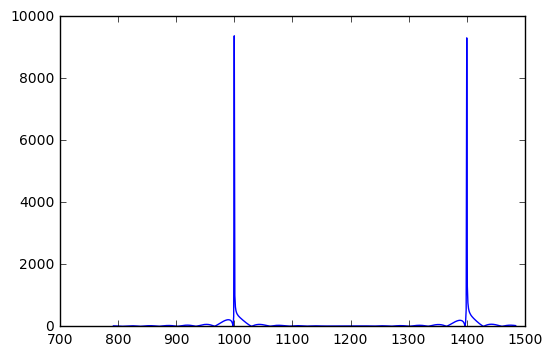

In [195]:
# Compute the magnitude spectrum for your signal. 
# Plot the spectrum 

spec3 = fft.fft(file3)
magSpec3 = abs(spec3)
halfSiz3 = int(size(magSpec3)/2)
freqs3 = fftfreq(size(magSpec3), 1/44100)

play(file3)
plot(freqs3[800:1500], magSpec3[800:1500])

In [196]:
## 3. file3.wav contains two sine tones. What frequencies are they?

file3_copy = numpy.copy(magSpec3[0:halfSiz3]) #working copy of magSpec2

firstMax3_1 = argmax(file3_copy) #find first max val
firstMax3_1_f = freqs2[firstMax3_1] #note its frequency...
print firstMax3_1_f
file3_copy[firstMax3_1]=0 #..then zero it

firstMax3_2 = argmax(file3_copy) #do it again
firstMax3_2_f = freqs2[firstMax3_2] #note its frequency...
print firstMax3_2_f
file3_copy[firstMax3_1]=0 #..then zero it

#Answer: 1000 Hz, 1400H

999.932650862
1399.90571121


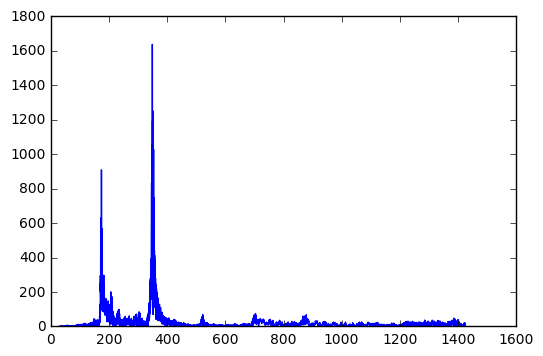

In [197]:
# Compute the magnitude spectrum for your signal. 
# Plot the spectrum 

spec4 = fft.fft(file4)
magSpec4 = abs(spec4)
halfSiz4 = int(size(magSpec4)/2)
freqs4 = fftfreq(size(magSpec4), 1/44100)

play(file4)
plot(freqs4[100:5000], magSpec4[100:5000])

In [78]:
#4. Optional (advanced): Real-world voice analysis

# file4.wav contains two spoken vowels. Try using Python to do some preliminary analysis, using both the time-domain signal (i.e., the waveform) and the FFT. For instance:
# What is the fundamental frequency of these vowels? 
# At what time does the second vowel begin to be spoken?
# How might you computationally determine which vowels are spoken?
# FORMANTS: https://en.wikipedia.org/wiki/Formant

plt.specgram(file4, NFFT = halfSiz4, Fs = 44100, noverlap = 900)
plt.show()

In [208]:
# By listening to the recording and looking at the spectrogram above, 
# I am going to calculate ffts on the two halves of the recording

firstHalf = file4[500 : 15000]
secondHalf = file4[halfSiz4+10000 : halfSiz4+20000]
ftt4_1 = fft.fft(firstHalf)
ftt4_2 = fft.fft(secondHalf)
magHS4_1 = abs(ftt4_1)
magHS4_2 = abs(ftt4_2)
hhs4_1 = int(size(magHS4_1)/2)
hhs4_2 = int(size(magHS4_2)/2)

f4_1 = fft.fftfreq(size(magHS4_1), 1/44100)
f4_2 = fft.fftfreq(size(magHS4_2), 1/44100)

play(firstHalf)


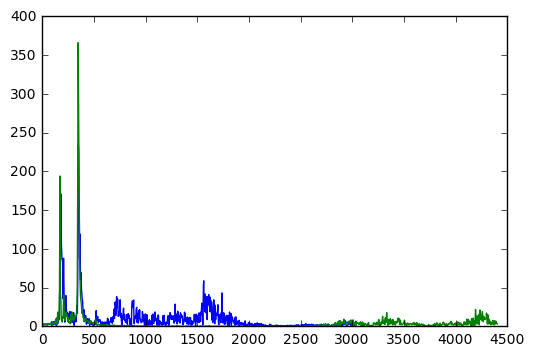

In [207]:
plot(f4_1[0:1000], magHS4_1[0:1000])
plot(f4_2[0:1000], magHS4_2[0:1000])
play(secondHalf)

[ 115.  116.   58.   60.  118.  114.  117.   57.   59.  120.   61.   62.
  121.   68.  119.   64.   63.   65.  123.  124.   56.  122.  514.   69.
   67.  113.  513.  125.  572.  126.]
[  349.75862069   352.8          176.4          182.48275862   358.88275862
   346.71724138   355.84137931   173.35862069   179.44137931   364.96551724
   185.52413793   188.56551724   368.00689655   206.8137931    361.92413793
   194.64827586   191.60689655   197.68965517   374.08965517   377.13103448
   170.31724138   371.04827586  1563.26896552   209.85517241   203.77241379
   343.67586207  1560.22758621   380.17241379  1739.66896552   383.2137931 ]
 


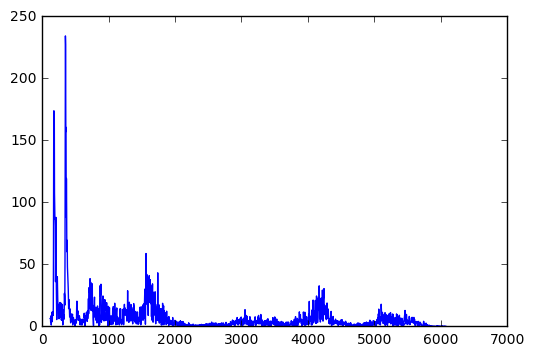

In [219]:
file4_copy1 = np.copy(magHS4_1) #working copy of the magnitude spectrum for the first slice

maxes1 = np.array([])
fmaxes1 = np.array([])

for i in range (30) :
    tempIndex = argmax(file4_copy1[0:hhs4_1])
    maxes1= np.append(maxes1, tempIndex) #find first max val
    fmaxes1 = np.append(fmaxes1, f4_1[tempIndex]) #note its frequency...
    file4_copy1[tempIndex]=0 #...then zero it in the working array
    
print(maxes1)
print(fmaxes1)
print(" ")
    
plot(f4_1[40:2000], magHS4_1[40:2000]) #plot the first slice fft


[  79.   80.   39.   78.   81.   82.   83.   77.   38.   40.   47.   84.
   41.   85.   86.   48.  951.  961.   76.  966.   34.   66.   52.   89.
  756.   87.  975.   51.   88.   63.]
[  348.39   352.8    171.99   343.98   357.21   361.62   366.03   339.57
   167.58   176.4    207.27   370.44   180.81   374.85   379.26   211.68
  4193.91  4238.01   335.16  4260.06   149.94   291.06   229.32   392.49
  3333.96   383.67  4299.75   224.91   388.08   277.83]
 


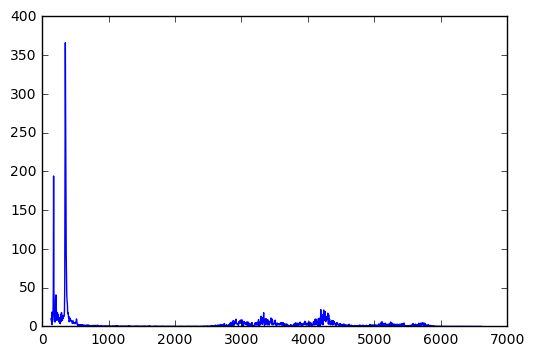

In [220]:
file4_copy2 = np.copy(magHS4_2) #working copy of the magnitude spectrum for the second slice

plot(f4_2[30:1500], magHS4_2[30:1500]) #plot the second slice fft

maxes2 = np.array([])
fmaxes2 = np.array([])

for i in range (30) :
    tempIndex = argmax(file4_copy2[0:hhs4_2])
    maxes2= np.append(maxes2, tempIndex) #find first max val
    fmaxes2 = np.append(fmaxes2, f4_2[tempIndex]) #note its frequency...
    file4_copy2[tempIndex]=0 #...then zero it in the working array

print(maxes2)
print(fmaxes2)
print(" ")    

In [ ]:
# A formant, as defined by James Jeans,is a harmonic of a note that is augmented by a resonance (Wikipedia)
# In this case the fundamental frequency will be the frequency Rebecca is speaking at 
# - the formants which are enhanced by this frequency being produced will be our indicators

# >> What is the fundamental frequency of these vowels? 
# -- circa: 352 - 177 = 175 (difference between the 2 most prominents harmonics)

# >> At what time does the second vowel begin to be spoken? 
# -- a bit after the mid point

# How might you computationally determine which vowels are spoken?
# -- We can determine what the fundamental is, then remove that and any other strong harmonic from the spectrum
# If we then look at the remaining maxima (making sure to group those frequency bins that are close to one other together),
# We can see that in the first half of the sound we have the strongest energy presence at 200(+/-)Hz and 1600(+/-)Hz,
# whilst in the second half of the sound we have the strongest energy presence at 200Hz and 4200+ Hz
# By constructing a map of what vowels formants correspond to (such as this: http://auditoryneuroscience.com/topics/two-formant-artificial-vowels),
# we can computationally determine which vocals are spoken



## Part 3: Musical expectation

Choose a recording of a piece of music from YouTube, Spotify, or SoundCloud. Listen to it and respond to the following prompts:
- Provide a URL or other identifying information for the song, so we can find exactly the same version as you.
- Name three things this piece of music does to satisfy schematic musical expectations over time, along with the timepoint of each one. That is, you should name three things it does which are typical of music of this genre. This could be the way one melody note follows another, the way a harmonic sequence unfolds, the way a rhythmic section is played, or something else. (Use specific music theory terminology if you can, but otherwise just describe what you hear as precisely as you're able.)
- Name one or two things this music does that is surprising in light of schematic musical expectations, along with the timepoint(s). Also describe the effect this has on you, personally, as a listener.
- In addition to breaking your expectations at some points, does the music do anything else to increase or maintain arousal or attention? This could relate to the tempo/speed, volume, instrumentation/timbre, or any number of other things.

1)
> Autechre - SYptixed
- https://www.youtube.com/watch?v=rQ84hKQPTAA

2) 
> - (a) 1:28 - after a long fairly melodic intro and a brief moment of almost silence, the beat comes in with the bass, which is something to expect in a piece of electronic music with such an intro
> - (b) 3:17 - as the musical phrase ends there is a harmonic resolution that leads into the next, different phrase, which roughly repeats the melodic motif
> - (c) 6:15 - as the outro starts, the same pad-like sounds of the intro are reprised to guide the listener out of the song

3)
> - (a) 1:15 - after the pad-filled intro and just before the bass drive beat, this moment of silence filled with noises surprise the listener by introducing a rhythm which is not typical of electronic beats (the kick-drum-like bass will confirm this in a few seconds by clearly defining a 3/4 (or possibly 6/8) time signature)
> - (a) 1:42 - the bass drum is slightly held (falls slightly late), which gives a very subtle sense of suspension

4)
> Yes, the track uses alternance of minor and major harmonic chords to build and release tension, as well as a fair use of dissonance when tension needs to be enhanced. The piece also increases the sound density by progressively adding more harmonic pads and leads until 4:46, when they are made "crumble" away using some sound mangling technique. They remain there, half broken, giving the track a more syncopated feel, and a new dimension of tension, until about 5:40 to 5:55, when the bass "swallows" the rimaining higher-frequency pitched sounds away